In [430]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import minimize
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL

In [431]:
# define probability function
def pdf(x, mu, sigma, a, b):

    # cdf from a to b
    cdf = lambda x: 0.5 * (1 + erf((x - mu) / (sigma * (2 ** 0.5))))

    # normalization constant
    N = 1 / (1 - (cdf(b) - cdf(a)))
    
    # return gaussian
    return N * (1 / (sigma * ((2 * np.pi) ** 0.5))) * (np.exp ((-0.5 * (((x - mu) / sigma) ** 2))))

In [432]:
# set the parameters 
mu_true = 0.1
sigma_true = 0.9
a_true = - 1.2
b_true = - 0.4
num_samples = 100000

# generate data that follows gaussian distribution 
data = np.random.normal(mu_true, sigma_true, num_samples)

# remove data that falls between a and b
data = [x for x in data if x > b_true or x < a_true]

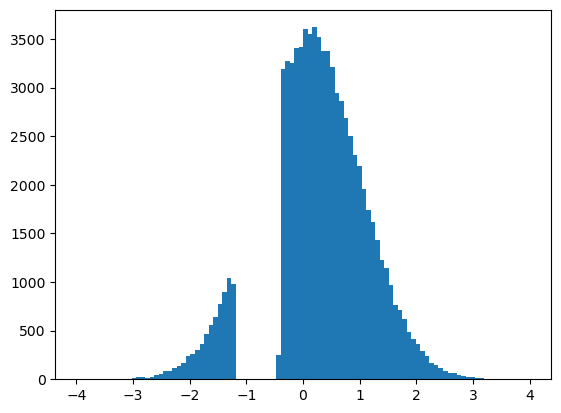

In [433]:
# plot data as histogram
plt.hist(data, bins=100)
plt.show()

In [434]:
# define the model to generate the PDF of p 
def nll(mu, sigma, a, da):
    nll = 0
    for x in data:
        if x < a + da and x > a:
            nll += - np.log(0.00000000001)
        else:
            nll += - np.log(pdf(x, mu, sigma, a, a + da))
    return nll

In [435]:
# Use iminuit to minimize the NLL
m = Minuit(nll, mu=0.01, sigma=1.5, a=-1, da=0.2)

# Set limits on parameters
m.limits['mu'] = (-5, 5)
m.limits['sigma'] = (0.0001, 5)
m.limits['a'] = (-5, 5)
m.limits['da'] = (0.0001, 5)

m.migrad()

params = m.values

m.hesse()

/var/folders/ry/r28_vw1507xg9nf1c8mtsr500000gn/T/ipykernel_21077/295934724.py:8: RuntimeWarning: divide by zero encountered in log
  nll += - np.log(pdf(x, mu, sigma, a, a + da))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.781e+04                  │              Nfcn = 442              │
│ EDM = 8.96e+04 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   0.165   │   0.004   │            │            │   -5    │    5    │       │
│ 1 │ sigma │  0.8815   │  0.0029   │            │            │ 0.0001  │    5    │       │
│ 2 │ a     │-1.0000004 │ 0.0000014 │            │            │   -5    │    5    │       │
│ 3 │ da    │ 600.01e-3 │  0.08e-3  │            │            │ 0.0001  │    5    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │       mu    sigma        a       da │
├───────┼─────────────────────────────────────┤
│    mu │ 2.02e-05     0e-6  4.0e-12     0e-9 │
│ sigma │     0e-6 8.33e-06  0.9e-12     0e-9 │
│     a │  4.0e-12  0.9e-12 1.82e-12 10.0e-12 │
│    da │     0e-9     0e-9 10.0e-12 6.54e-09 │
└───────┴─────────────────────────────────────┘

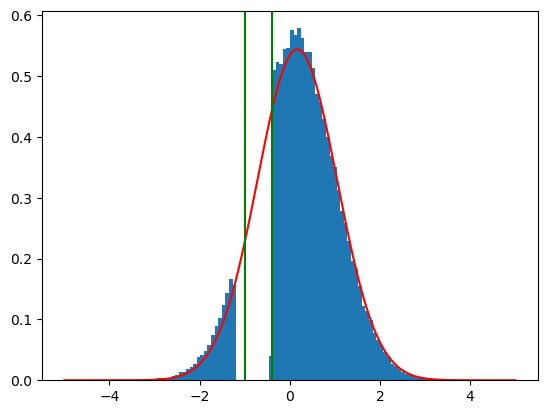

In [436]:
# plot gaussian with fitted parameters
x = np.linspace(-5, 5, 1000)
y = pdf(x, params['mu'], params['sigma'], params['a'], params['a'] + params['da'])
plt.plot(x, y, color='red')

# plot a and b on x axis
plt.axvline(x=params['a'], color='green')
plt.axvline(x=params['a'] + params['da'], color='green')

# plot data as frequency histogram
plt.hist(data, bins=100, density = True)
plt.show()